In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np 
import json

## Loading the Data 

**Data**
- file_name: df_final_sku_store_quarter_v3.csv
- description : this dataframe is grouped on SKU, STORE and Quarter combined with data of other tables and engineered features

In [2]:
BASE_DIR=os.path.dirname(os.getcwd())
print(BASE_DIR)

DATA_DIR=os.path.join(BASE_DIR,'data')
print(DATA_DIR)

MODEL_DIR=os.path.join(BASE_DIR,'models')
assert os.path.exists(MODEL_DIR)

data_path=os.path.join(DATA_DIR, 'df_final_sku_store_quarter_v3.csv')
print(data_path)

/Users/dare_devil/Desktop/MLDS_2024/Quarter1/Everything_Starts_With_Data/Project/MLDS_400_G11
/Users/dare_devil/Desktop/MLDS_2024/Quarter1/Everything_Starts_With_Data/Project/MLDS_400_G11/data
/Users/dare_devil/Desktop/MLDS_2024/Quarter1/Everything_Starts_With_Data/Project/MLDS_400_G11/data/df_final_sku_store_quarter_v3.csv


In [3]:
df_orig = pd.read_csv(data_path)
df = df_orig.copy()
df_orig.head()

,STORE,COUNT_ITEMS,MenRatio,White,Asian,Income,Poverty,Professional,Construction,Unemployment,...,VENDOR,BRAND,CLASSID,CITY,STATE,ZIP,COST,RETAIL,PROF_MARG,DISCOUNTED
0,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,5016699,TIMBERLA,913,TAMPA,FL,33607,38.0,79.0,0.481013,True
1,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,6713105,INTERNAT,203,TAMPA,FL,33607,2.0,3.0,0.666667,True
2,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,9520439,BALI/HEN,873,TAMPA,FL,33607,8.0,18.0,0.444444,False
3,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,5010255,ENZO ANG,214,TAMPA,FL,33607,28.5,60.0,0.475000,False
4,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,5010255,ENZO ANG,214,TAMPA,FL,33607,28.5,60.0,0.475000,True


In [4]:
df.columns

Index(['STORE', 'COUNT_ITEMS', 'MenRatio', 'White', 'Asian', 'Income',
       'Poverty', 'Professional', 'Construction', 'Unemployment', 'SKU',
       'quarter', 'totalunitssold', 'averageoriginalprice',
       'averagesellingprice', 'purchase_count', 'return_count',
       'purchase_prob', 'DEPT', 'PACKSIZE', 'VENDOR', 'BRAND', 'CLASSID',
       'CITY', 'STATE', 'ZIP', 'COST', 'RETAIL', 'PROF_MARG', 'DISCOUNTED'],
      dtype='object')

In [5]:
del df_orig

In [6]:
# Counting the Unique Values of Categorical Variables
df['STORE']=df['STORE'].astype('str')
df['DEPT']=df['DEPT'].astype('str')
df['VENDOR']=df['VENDOR'].astype('str')
for col in df.columns:
    if df[col].dtype == 'O':
        print(col, df[col].unique().shape[0])

STORE 325
quarter 4
DEPT 60
VENDOR 1363
BRAND 1135
CLASSID 758
CITY 264
STATE 29


In [7]:
# Adding the revenue column in the dataframe by multiplying averagesellingprice and totalunitssold
# Taking log of the revenue to normalize the distribution
# Dropping the averagesellingprice and totalunitssold columns
df['revenue'] = df['averagesellingprice'] * df['totalunitssold']

(0.0, 1000.0)

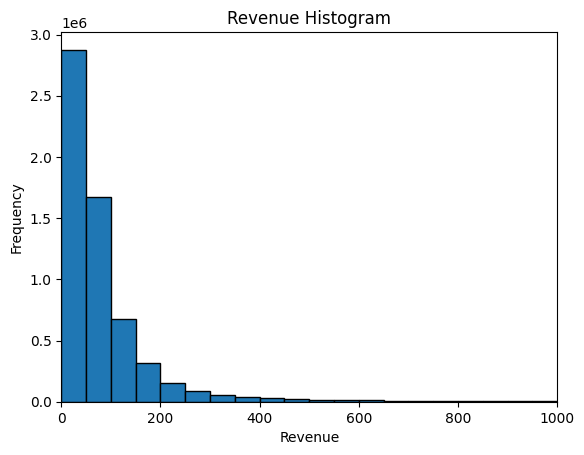

In [8]:
# Create a histogram and set the x-axis scale
plt.hist(df['revenue'], bins=20, range=(0, 1000), edgecolor='black')  # Adjust the number of bins as needed
plt.title('Revenue Histogram')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.xlim(0, 1000)

In [9]:
df['revenue'] = np.log(df['revenue']+1)
df.drop(columns = ['averagesellingprice', 'totalunitssold'],axis=1, inplace=True)

(0.0, 10.0)

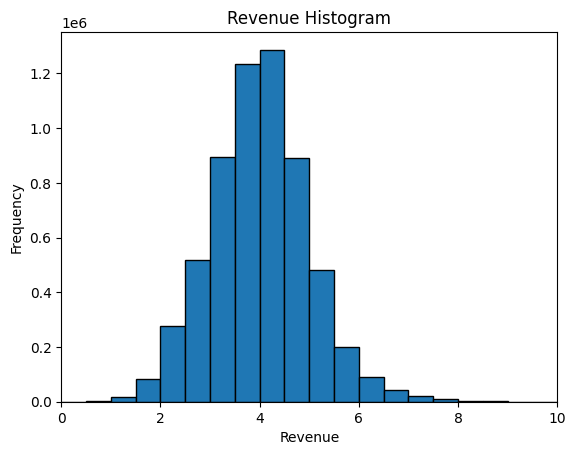

In [10]:
plt.hist(df['revenue'], bins=20, range=(0, 10), edgecolor='black')  # Adjust the number of bins as needed
plt.title('Revenue Histogram')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.xlim(0, 10)

In [16]:
# Getting Top 20 brands based on Revenue
# Encoding the top20 brands in the dataframe
# If brand is in top20 brands, then that columns is Hot, otherwise everything is 0 
topk=20
top_k_brands = df.groupby('BRAND')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(topk).BRAND.tolist()

In [20]:
# Saving the top20 brands as dictionary to be used at test time transformations
with open(os.path.join(MODEL_DIR, 'top_k_brands.json'), 'w') as f:
    json.dump(top_k_brands, f)

In [59]:
for brand in top_k_brands:
    df[brand] = np.where(df['BRAND']==brand,1,0) 

In [60]:
df.head()

,STORE,COUNT_ITEMS,MenRatio,White,Asian,Income,Poverty,Professional,Construction,Unemployment,...,BYER CAL,NOBLE EX,LEVI STR,CHANEL I,KIDS HEA,DAX CORP,KORET OF,VANITY F,NOBILITY,WESTPOIN
0,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
1,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
2,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
3,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
4,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Dropping the unnnecessary columns from the dataset 
drop_cols = [
    'SKU', 'purchase_count', 'return_count', 'VENDOR', 'purchase_prob', 'CITY', 'BRAND', 'PROF_MARG', 'ZIP'
]

df.drop(columns=drop_cols , axis=1, inplace=True)

In [62]:
df.head()

,STORE,COUNT_ITEMS,MenRatio,White,Asian,Income,Poverty,Professional,Construction,Unemployment,...,BYER CAL,NOBLE EX,LEVI STR,CHANEL I,KIDS HEA,DAX CORP,KORET OF,VANITY F,NOBILITY,WESTPOIN
0,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
1,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
2,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
3,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
4,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Applying Log Transformation to COST, RETAIL, averageoriginalprice to normalise the distribution
df['COST'] = np.log(df['COST']+1)
df['RETAIL'] = np.log(df['RETAIL']+1)
df['averageoriginalprice'] = np.log(df['averageoriginalprice']+1)

In [64]:
df.head()

,STORE,COUNT_ITEMS,MenRatio,White,Asian,Income,Poverty,Professional,Construction,Unemployment,...,BYER CAL,NOBLE EX,LEVI STR,CHANEL I,KIDS HEA,DAX CORP,KORET OF,VANITY F,NOBILITY,WESTPOIN
0,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
1,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
2,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
3,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0
4,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Creating dummies for the categorical variables to be included
cat_variables = ['STORE', 'quarter', 'DEPT', 'CLASSID', 'STATE']
df_final = pd.get_dummies(df, columns=cat_variables, drop_first=True)
df_final.head()

,COUNT_ITEMS,MenRatio,White,Asian,Income,Poverty,Professional,Construction,Unemployment,averageoriginalprice,...,STATE_NM,STATE_NV,STATE_OH,STATE_OK,STATE_SC,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_WY
0,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,4.382027,...,False,False,False,False,False,False,False,False,False,False
1,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,1.945910,...,False,False,False,False,False,False,False,False,False,False
2,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,2.944439,...,False,False,False,False,False,False,False,False,False,False
3,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,4.110874,...,False,False,False,False,False,False,False,False,False,False
4,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,4.110874,...,False,False,False,False,False,False,False,False,False,False


In [67]:
# Random Sampling 400k rows of dataset and splitting into 80, 20 train , val split
train_sample_size = 400000
df_train = df_final.sample(n=train_sample_size)

val_pct = 0.2
val_count = int(0.2 * train_sample_size)
train_count = train_sample_size - val_count

train_type = ['train'] * train_count + ['val'] * val_count


import random
random.shuffle(train_type)

df_train['train_type'] = train_type 
df_train.to_csv(os.path.join(DATA_DIR, 'sample_train_v1.csv'), index=False)